# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [66]:
import numpy as np
import pandas as pd

import sqlite3 as sql

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = sql.connect("baseball.sqlite")

In [151]:
pd.read_sql("""
    SELECT DISTINCT lgid, teamid, name FROM teams
    WHERE lgid IN ('AL', 'NL')
    ORDER BY lgid
""", db)

,lgID,teamID,name
0,AL,BLA,Baltimore Orioles
1,AL,BOS,Boston Americans
2,AL,CHA,Chicago White Sox
3,AL,CLE,Cleveland Blues
4,AL,DET,Detroit Tigers
5,AL,MLA,Milwaukee Brewers
6,AL,PHA,Philadelphia Athletics
7,AL,WS1,Washington Senators
8,AL,CLE,Cleveland Bronchos
9,AL,SLA,St. Louis Browns


In [92]:
pd.read_sql("""
    SELECT yearid, teamid, SUM(salary) AS payroll FROM
    salaries
    WHERE yearid BETWEEN 2006 AND 2016
    GROUP BY teamid, yearid
    ORDER BY payroll DESC
    LIMIT 20
""", db)

,yearID,teamID,payroll
0,2013,NYA,231978886
1,2013,LAN,223362196
2,2016,NYA,222997792
3,2016,LAN,221288380
4,2014,LAN,217014600
5,2015,LAN,215792000
6,2015,NYA,212751957
7,2008,NYA,207896789
8,2010,NYA,206333389
9,2011,NYA,202275028


Teams with the top 5 payrolls: NYA, LAN, DET, BOS, PHI. Now let's get the team names and a DataFrame that only contains these teams' payrolls over the specified time interval.

In [138]:
s1 = """
(SELECT sum(salary) as payroll, yearID, teamID, lgID
    FROM salaries
    WHERE yearID BETWEEN 2006 AND 2016
    GROUP BY yearID, teamID)
"""

s2 = """
(SELECT DISTINCT yearID, teamID, name
    FROM teams
    WHERE lgID IN ('AL', 'NL') AND yearID BETWEEN 2006 AND 2016)
"""

df1 = pd.read_sql("""
    SELECT s1.yearID, s2.name, s2.teamID, payroll
    FROM {} AS s1
    JOIN {} AS s2
    ON s1.teamID = s2.teamID AND s1.yearID = s2.yearID
    WHERE s1.teamID IN ('NYA', 'LAN', 'DET', 'BOS', 'PHI')
    ORDER BY name, s1.yearID
""".format(s1,s2), db)

df1 # Top 5 payroll teams

,yearID,name,teamID,payroll
0,2006,Boston Red Sox,BOS,120099824
1,2007,Boston Red Sox,BOS,143026214
2,2008,Boston Red Sox,BOS,133390035
3,2009,Boston Red Sox,BOS,121345999
4,2010,Boston Red Sox,BOS,162447333
5,2011,Boston Red Sox,BOS,161762475
6,2012,Boston Red Sox,BOS,173186617
7,2013,Boston Red Sox,BOS,151530000
8,2014,Boston Red Sox,BOS,139019929
9,2015,Boston Red Sox,BOS,181103400


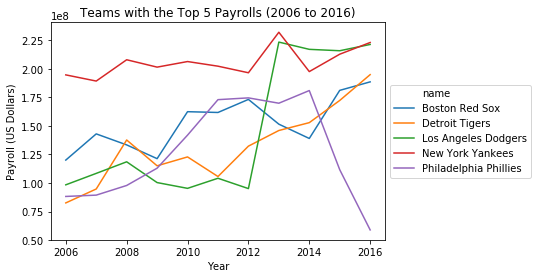

In [139]:
ax = sns.lineplot("yearID", "payroll", hue = "name", data = df1)
    
ax.set_title("Teams with the Top 5 Payrolls (2006 to 2016)")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (US Dollars)")

# Put a legend to the right of the current axis
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

ax

Examining the graph of the 5 teams with the highest payrolls shows that there is a general increasing trend in payrolls over the 2006-2016 period. Since the payroll figures are given in nominal dollars, this trend could be attributed to inflation. There do appear to be two anomalies to this trend, however. The LA Dodgers had a large spike in their payroll in 2013 compared to their payroll in 2012, and the Philadelphia Phillies had sharp decreases in their payroll from 2014 to 2015 and from 2015 to 2016. After some investigating into these anomalies, I discovered that the LA Dodgers changed management from Frank McCourt to Guggenheim Baseball Management during 2012, so perhaps a new management philosophy could have contributed to the sudden increase in payroll. Indeed, Wikipedia states "the new ownership group put their stamp on the team quickly by making a number of big trades and putting more money into the team than McCourt did." The Philadelphia Phillies had a poor 2013 season, leading to a decision to change coaches for the 2014 season. Unfortunately, they continued performing poorly in 2014 and 2015, finishing the 2015 season with the worst record in the majors. This could have contributed to the sharp decline in payroll for the Phillies, as their poor record might have caused the team's management to restructure and rebuild the team with lower salary players.

To compare the teams with the five highest payrolls to the other teams, let's take the average of the other teams' payrolls for each year. Then we'll combine this average "team" payroll data with our top 5 teams into a new DataFrame so we can compare the average (not top 5) team to the top 5 teams graphically.

In [183]:
df2 = pd.read_sql("""
    SELECT yearID, AVG(payroll) AS payroll FROM
        (SELECT yearID, teamid, SUM(salary) AS payroll
        FROM salaries
        WHERE (yearID BETWEEN 2006 AND 2016
            AND lgID IN ('AL', 'NL')
            AND teamID NOT IN ('NYA', 'LAN', 'DET', 'BOS', 'PHI'))
        GROUP BY yearID, teamID)
    GROUP BY yearID
""", db)

df2

,yearID,payroll
0,2006,6.949505e+07
1,2007,7.406882e+07
2,2008,7.957673e+07
3,2009,8.053712e+07
4,2010,7.969711e+07
5,2011,8.150409e+07
6,2012,8.644199e+07
7,2013,8.447208e+07
8,2014,9.219755e+07
9,2015,1.048207e+08


In [184]:
df2["name"] = "Average of Other Teams"
df2["teamID"] = "AVG"
df2 = df2[["yearID", "name", "teamID", "payroll"]]

df2

,yearID,name,teamID,payroll
0,2006,Average of Other Teams,AVG,6.949505e+07
1,2007,Average of Other Teams,AVG,7.406882e+07
2,2008,Average of Other Teams,AVG,7.957673e+07
3,2009,Average of Other Teams,AVG,8.053712e+07
4,2010,Average of Other Teams,AVG,7.969711e+07
5,2011,Average of Other Teams,AVG,8.150409e+07
6,2012,Average of Other Teams,AVG,8.644199e+07
7,2013,Average of Other Teams,AVG,8.447208e+07
8,2014,Average of Other Teams,AVG,9.219755e+07
9,2015,Average of Other Teams,AVG,1.048207e+08


In [160]:
top5_vs_avg = pd.concat([df1, df2], ignore_index = True)

top5_vs_avg

,yearID,name,teamID,payroll
0,2006,Boston Red Sox,BOS,1.200998e+08
1,2007,Boston Red Sox,BOS,1.430262e+08
2,2008,Boston Red Sox,BOS,1.333900e+08
3,2009,Boston Red Sox,BOS,1.213460e+08
4,2010,Boston Red Sox,BOS,1.624473e+08
5,2011,Boston Red Sox,BOS,1.617625e+08
6,2012,Boston Red Sox,BOS,1.731866e+08
7,2013,Boston Red Sox,BOS,1.515300e+08
8,2014,Boston Red Sox,BOS,1.390199e+08
9,2015,Boston Red Sox,BOS,1.811034e+08


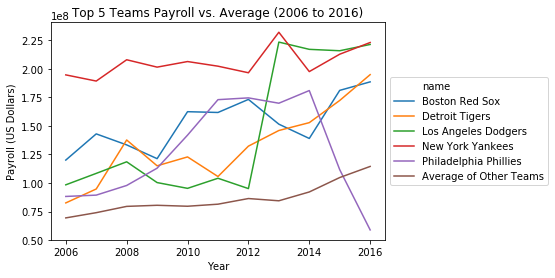

In [163]:
ax = sns.lineplot("yearID", "payroll", hue = "name", data = top5_vs_avg)
    
ax.set_title("Top 5 Team Payrolls vs. Average (2006 to 2016)")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (US Dollars)")

# Put a legend to the right of the current axis
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

ax

By comparing the graphs of the top 5 team payrolls to the average of the other teams' payrolls for each year, we can see that the highest payroll teams are consistently higher than the other teams' average payroll in each year (with the exception of the Phillies, who dip below the average payroll curve in 2016.

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

__1. How much have payrolls increased over the years in real dollars?__

First, let's extract the average payroll for each year like we did in 1.1.4, but without excluding any teams. Then we'll make a line plot of the data.

In [187]:
avg_payroll = pd.read_sql("""
    SELECT yearID, AVG(payroll) AS payroll FROM
        (SELECT yearID, teamid, SUM(salary) AS payroll
        FROM salaries
        WHERE lgID IN ('AL', 'NL')
        GROUP BY yearID, teamID)
    GROUP BY yearID
""", db)

avg_payroll

,yearID,payroll
0,1985,1.007557e+07
1,1986,1.184056e+07
2,1987,1.048367e+07
3,1988,1.155586e+07
4,1989,1.384599e+07
5,1990,1.707235e+07
6,1991,2.357879e+07
7,1992,3.098244e+07
8,1993,3.220500e+07
9,1994,3.313701e+07


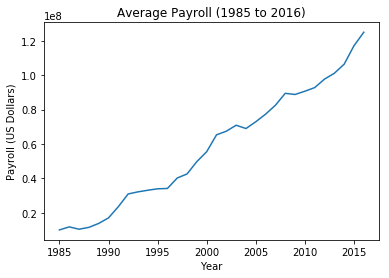

In [189]:
ax = sns.lineplot("yearID", "payroll", data = avg_payroll)
    
ax.set_title("Average Payroll (1985 to 2016)")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (US Dollars)")

ax

1. Who were the highest payed players of all time?

2. Is there a relationship between RBI (runs batted in) and salary for position players?

3. Is there a relationship between OPS (on-base plus slugging) and salary for position players?

4. Is there a relationship between ERA (earned-run average) and salary for pitchers?

5. How does switching teams affect salary?

In [103]:
pd.read_sql("""
    SELECT l.playerid, nameFirst, nameLast, total_RBI FROM 
        (SELECT playerid, SUM(RBI) as total_RBI FROM batting
        GROUP BY playerid) AS l
    JOIN
        (SELECT playerid, nameFirst, nameLast FROM people) AS r
    ON l.playerid = r.playerid
    WHERE total_RBI > 0
    ORDER BY total_RBI DESC
""", db)

,playerid,nameFirst,nameLast,total_RBI
0,aaronha01,Hank,Aaron,2297.0
1,ruthba01,Babe,Ruth,2217.0
2,rodrial01,Alex,Rodriguez,2086.0
3,ansonca01,Cap,Anson,2075.0
4,bondsba01,Barry,Bonds,1996.0
5,gehrilo01,Lou,Gehrig,1995.0
6,pujolal01,Albert,Pujols,1982.0
7,musiast01,Stan,Musial,1951.0
8,cobbty01,Ty,Cobb,1944.0
9,foxxji01,Jimmie,Foxx,1922.0


In [113]:
rbi_df = pd.read_sql("""
    SELECT l.playerid, nameFirst, nameLast, total_RBI, total_salary FROM
        (SELECT li.playerid, nameFirst, nameLast, total_RBI FROM 
            (SELECT playerid, SUM(RBI) as total_RBI FROM batting
            GROUP BY playerid) AS li
        JOIN
            (SELECT playerid, nameFirst, nameLast FROM people) AS ri
        ON li.playerid = ri.playerid) AS l
    LEFT JOIN
        (SELECT playerid, SUM(salary) as total_salary FROM salaries
        GROUP BY playerid) AS r
    ON l.playerid = r.playerid
    ORDER BY total_RBI DESC
""", db)

rbi_df

,playerid,nameFirst,nameLast,total_RBI,total_salary
0,aaronha01,Hank,Aaron,2297.0,NaN
1,ruthba01,Babe,Ruth,2217.0,NaN
2,rodrial01,Alex,Rodriguez,2086.0,398416252.0
3,ansonca01,Cap,Anson,2075.0,NaN
4,bondsba01,Barry,Bonds,1996.0,188245322.0
5,gehrilo01,Lou,Gehrig,1995.0,NaN
6,pujolal01,Albert,Pujols,1982.0,204040436.0
7,musiast01,Stan,Musial,1951.0,NaN
8,cobbty01,Ty,Cobb,1944.0,NaN
9,foxxji01,Jimmie,Foxx,1922.0,NaN


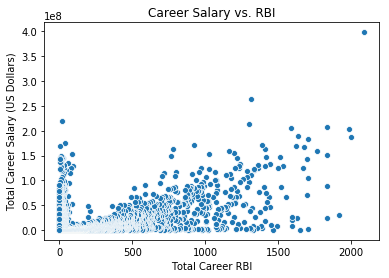

In [114]:
ax = sns.scatterplot("total_RBI", "total_salary", data = rbi_df)
    
ax.set_title("Career Salary vs. RBI")
ax.set_xlabel("Total Career RBI")
ax.set_ylabel("Total Career Salary (US Dollars)")

ax

In [128]:
pd.read_sql("""
    SELECT yearid, teamid, playerid, salary FROM salaries
    WHERE playerid = 'rodrial01'
""", db)

,yearID,teamID,playerID,salary
0,1994,SEA,rodrial01,442333
1,1995,SEA,rodrial01,442333
2,1996,SEA,rodrial01,442334
3,1997,SEA,rodrial01,1062500
4,1998,SEA,rodrial01,2162500
5,1999,SEA,rodrial01,3112500
6,2000,SEA,rodrial01,4362500
7,2001,TEX,rodrial01,22000000
8,2002,TEX,rodrial01,22000000
9,2003,TEX,rodrial01,22000000


In [ ]:
s1 = """
(SELECT SUM(salary) as payroll, yearID, teamID, lgID
    FROM salaries
    WHERE yearID BETWEEN 2006 AND 2016
    GROUP BY yearID, teamID)
"""

s2 = """
(SELECT DISTINCT yearID, teamID, name
    FROM teams
    WHERE lgID IN ('AL', 'NL') AND yearID BETWEEN 2006 AND 2016)
"""

df2 = pd.read_sql("""
    SELECT s1.yearID, AVG(payroll) AS payroll
    FROM {} AS s1
    JOIN {} AS s2
    ON s1.teamID = s2.teamID AND s1.yearID = s2.yearID
    WHERE s1.teamID NOT IN ('NYA', 'LAN', 'DET', 'BOS', 'PHI')
    GROUP BY s1.yearid
""".format(s1,s2), db)

df2 # Other teams